# Practical 11: Linear Regression using Scikit-Learn

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Linear Regression with Specific Input Lists

In [2]:
# a. Define input lists X and Y
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Y = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]

# Convert lists to numpy arrays and reshape X for sklearn
X_array = np.array(X).reshape(-1, 1)  # sklearn requires 2D array for X
Y_array = np.array(Y)

print(f"X data: {X}")
print(f"Y data: {Y}")

X data: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Y data: [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]


In [3]:
# b. Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 10 samples
Testing set size: 5 samples


In [4]:
# c. Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Display model parameters
print(f"Model coefficient (slope): {model.coef_[0]:.4f}")
print(f"Model intercept: {model.intercept_:.4f}")
print(f"Regression equation: Y = {model.intercept_:.4f} + {model.coef_[0]:.4f} * X")

Model coefficient (slope): 2.0000
Model intercept: 3.0000
Regression equation: Y = 3.0000 + 2.0000 * X


In [5]:
# d. Make predictions on the test dataset
Y_pred = model.predict(X_test)

# Display actual vs predicted values
print("Actual vs Predicted Values:")
for x, y_actual, y_pred in zip(X_test.flatten(), Y_test, Y_pred):
    print(f"X = {x}: Actual Y = {y_actual}, Predicted Y = {y_pred:.2f}")

# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Actual vs Predicted Values:
X = 10: Actual Y = 23, Predicted Y = 23.00
X = 12: Actual Y = 27, Predicted Y = 27.00
X = 1: Actual Y = 5, Predicted Y = 5.00
X = 14: Actual Y = 31, Predicted Y = 31.00
X = 6: Actual Y = 15, Predicted Y = 15.00

Mean Squared Error: 0.0000
R² Score: 1.0000


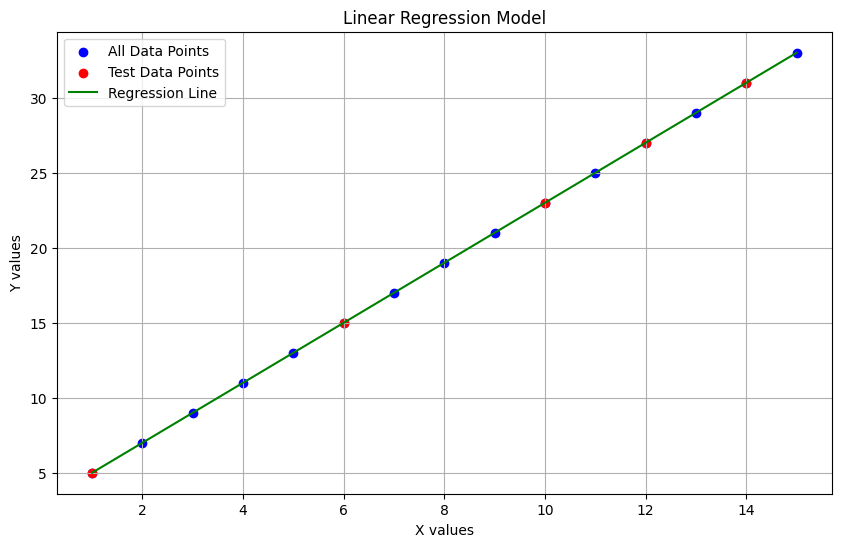

In [6]:
# e. Draw the plot of actual data and regression line
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(X_array, Y_array, color='blue', label='All Data Points')

# Highlight test points
plt.scatter(X_test, Y_test, color='red', label='Test Data Points')

# Plot the regression line
X_line = np.linspace(min(X), max(X), 100).reshape(-1, 1)
Y_line = model.predict(X_line)
plt.plot(X_line, Y_line, color='green', label='Regression Line')

# Add plot details
plt.title('Linear Regression Model')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.grid(True)
plt.show()

## Part 2: Repeating the Process with Random Datasets

In [7]:
# f. Function to create and analyze a random linear dataset
def analyze_random_dataset(n_samples=30, noise=10, test_size=0.3, random_state=None):
    # Generate random X values
    X = np.linspace(0, 10, n_samples)
    
    # Generate Y with a random slope, intercept and noise
    slope = np.random.uniform(1, 5)
    intercept = np.random.uniform(-10, 10)
    Y = slope * X + intercept + np.random.normal(0, noise, n_samples)
    
    # Reshape X for sklearn
    X = X.reshape(-1, 1)
    
    # Split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    
    # Create and train model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, color='blue', label='All Data')
    plt.scatter(X_test, Y_test, color='red', label='Test Data')
    
    # Plot regression line
    X_line = np.linspace(min(X.flatten()), max(X.flatten()), 100).reshape(-1, 1)
    Y_line = model.predict(X_line)
    plt.plot(X_line, Y_line, color='green', label='Regression Line')
    
    # Add details
    plt.title(f'Random Dataset: Y = {intercept:.2f} + {slope:.2f}X + noise')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print results
    print(f"True relationship: Y = {intercept:.4f} + {slope:.4f} * X + noise")
    print(f"Fitted model: Y = {model.intercept_:.4f} + {model.coef_[0]:.4f} * X")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 50)

Dataset 1: Low noise


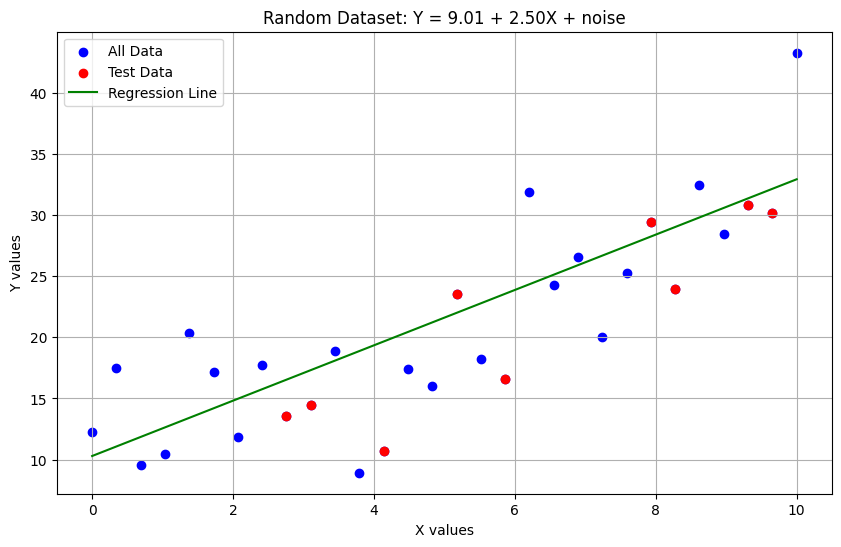

True relationship: Y = 9.0143 + 2.4982 * X + noise
Fitted model: Y = 10.2901 + 2.2623 * X
Mean Squared Error: 19.8490
R² Score: 0.6323
--------------------------------------------------

Dataset 2: Medium noise


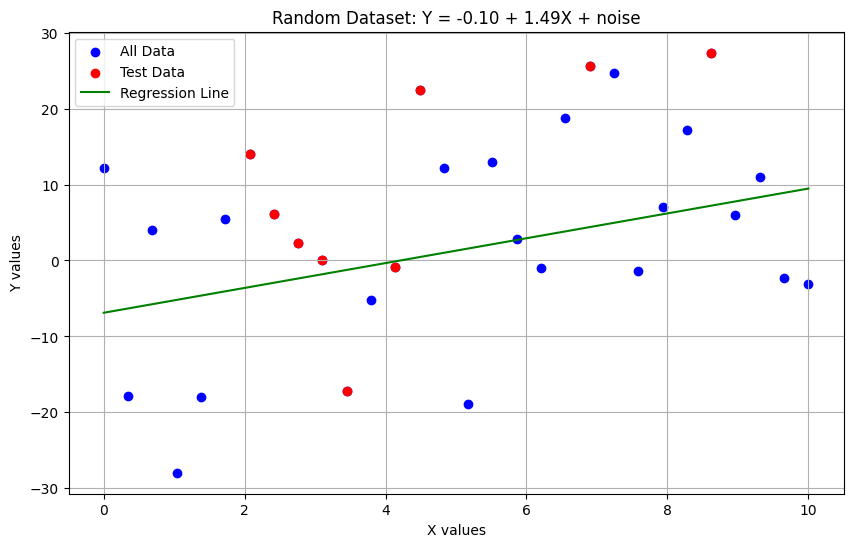

True relationship: Y = -0.0965 + 1.4882 * X + noise
Fitted model: Y = -6.8826 + 1.6356 * X
Mean Squared Error: 223.0652
R² Score: -0.1572
--------------------------------------------------

Dataset 3: High noise


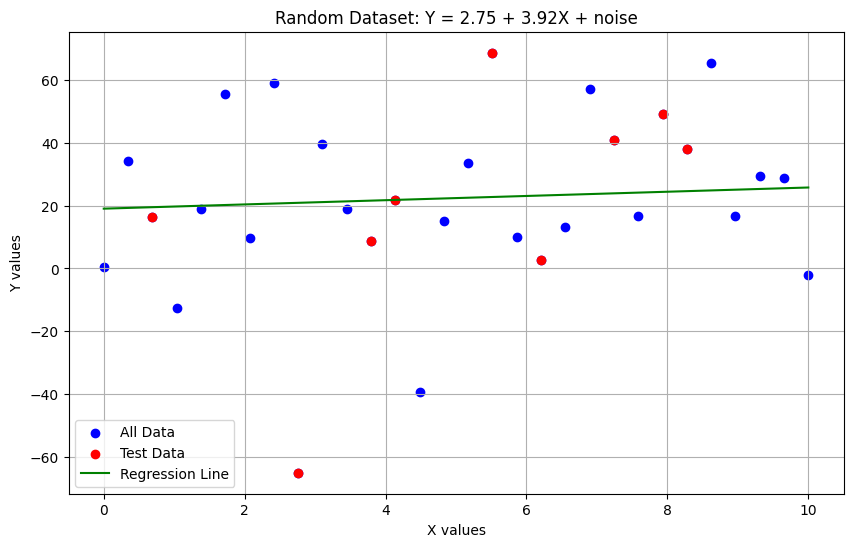

True relationship: Y = 2.7511 + 3.9184 * X + noise
Fitted model: Y = 19.0539 + 0.6735 * X
Mean Squared Error: 1242.2924
R² Score: 0.0416
--------------------------------------------------


In [8]:
# Generate and analyze 3 different random datasets
np.random.seed(42)  # For reproducibility

print("Dataset 1: Low noise")
analyze_random_dataset(noise=5, random_state=42)

print("\nDataset 2: Medium noise")
analyze_random_dataset(noise=15, random_state=43)

print("\nDataset 3: High noise")
analyze_random_dataset(noise=30, random_state=44)